In [160]:
import pandas as pd

fedrate_df = pd.read_csv(r"C:\Users\home\workspace\FED-Interest-Rate\data\FedReserveDataQuarterly.csv")

In [161]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def print_OLS_model(removedItem = None):
    xcolumns = ['GDPDeflat','CPIRate','UnemployRate', 'InflationRate', 'PCED']
    if(removedItem != None):
        xcolumns.remove(removedItem)
    predictors = pd.DataFrame(fedrate_df, columns = xcolumns)
    ycolumns = ['FedFundsRate']
    response = pd.DataFrame(fedrate_df, columns = ycolumns)
    
    # OLS
    lin_model = sm.OLS(response, predictors).fit()
    print(lin_model.summary())

print_OLS_model(None)

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     319.7
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           2.01e-59
Time:                        15:49:03   Log-Likelihood:                -209.21
No. Observations:                 104   AIC:                             428.4
Df Residuals:                      99   BIC:                             441.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         2.0161      0.437      4.612

               GDPDeflat   CPIRate  UnemployRate       ECI  InflationRate
GDPDeflat       1.000000  0.998494     -0.718384  0.992992      -0.672153
CPIRate         0.998494  1.000000     -0.713574  0.993855      -0.668419
UnemployRate   -0.718384 -0.713574      1.000000 -0.695810       0.401935
ECI             0.992992  0.993855     -0.695810  1.000000      -0.632817
InflationRate  -0.672153 -0.668419      0.401935 -0.632817       1.000000


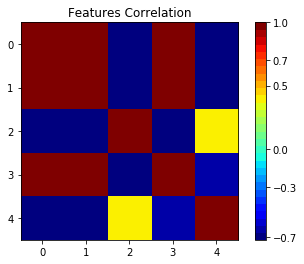

In [162]:
def correlation_matrix(dataframe):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(dataframe.corr(), interpolation="nearest", cmap = cmap)
    plt.title('Features Correlation')
    labels = ['GDP Deflation','CPI Rate','Unemploy Rate', 'Inflation Rate', 'PCED']
    fig.colorbar(cax, ticks=[-.7, -.3, 0, .5, .7, 1])
    plt.show()

print(predictors.corr())
correlation_matrix(predictors)


In [163]:
# Feature Selection
xcolumns = ['GDPDeflat','CPIRate','PCEDRate','UnemployRate','ECI', 'InflationRate']
print_OLS_model('GDPDeflat')
print_OLS_model('CPIRate')
print_OLS_model('PCED')
print_OLS_model('UnemployRate')
print_OLS_model('InflationRate')

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     327.9
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.56e-56
Time:                        15:49:07   Log-Likelihood:                -219.34
No. Observations:                 104   AIC:                             446.7
Df Residuals:                     100   BIC:                             457.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CPIRate          -0.2935      0.057     -5.128

In [165]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth = 5, random_state = 0, n_estimators = 500)
regr.fit(predictors, response.values.ravel())
print(regr.feature_importances_)


[0.24402339 0.24175057 0.05087179 0.22989618 0.23345806]


In [168]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 5, random_state = 0, n_estimators = 500)
gbrt.fit(predictors, response.values.ravel())
print(gbrt.feature_importances_)

[0.07770419 0.05640898 0.15740306 0.06851672 0.14396705]
